### 9.6 Kiến trúc mã hóa - giải mã
- Kiến trúc mã hóa - giải mã (encoder - decoder achitecture) là một khuôn mẫu thiết kế mạng nơ ron. Kiến trúc này có hai phần: Bộ mã hóa và bộ giải mã. 
- Bộ mã hóa đóng vai trò mã hóa đầu vào thành trạng thái chứa vài tensor, tiếp đó trạng thái được truyền vào bộ giải mã để sinh đầu ra. 
- Trong dịch máy, bộ mã hóa biến đổi một câu nguồn, ví dụ như "Hello world." thành trạng thái, chẳng hạn là một vector chứa thông tin ngữ nghĩa của câu đó. Sau đó bộ giải mã sử dụng trạng thái này để dịch câu sang ngôn ngữ đích, ví dụ sang tiếng Pháp.

    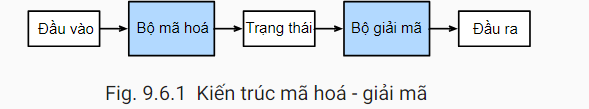

In [2]:
from d2l import torch as d2l
import torch
from torch import nn

#### 9.6.1 Bộ mã hóa
- Bộ mã hóa là một mạng nơ ron thông thường, nhận đầu vào, ví dụ như một câu nguồn và trả về đầu ra.

In [3]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()

    # later there can be additional arguments
    def forward(self, X, *args):
        raise NotImplementedError

#### 9.6.2 Bộ giải mã
- Bộ giải mã có thêm phương thức __init_state__ nhằm phân tích đầu ra của bộ mã hóa với nhưng thông tin bổ sung (nếu có), như độ dài hợp lệ của đầu vào, để đưa ra trạng thái cần thiết. Trong lan truyền xuôi, bộ giải mã nhận hai đầu vào, ví dụ như một câu đích và trạng thái. Nó trả về đầu ra với trạng thái nhiều khả năng đã thau đổi nếu bộ mã hóa chứa các tầng RNN.

In [4]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()

    # Later there can be additional arguments (e.g., length excluding padding)
    def init_state(self, enc_all_outputs, *args):
        raise NotImplementedError
    
    def forward(self, X, state):
        raise NotImplementedError

#### 9.6.3 Mô hình
- Mô hình mã hóa - giải mã bao gồm một bộ mã hóa và giải mã. Chúng ta lập trình phương thức truyền xuôi cho quá. Phương thức này nhận cả đầu vào bộ mõa hóa và đầu vào bộ giải mã cùng các đối số bổ sung bắt buộc. Mô hình tính đưa ra của bộ mã hóa để khởi tạo trạng thái bộ giải mã, sau đó trả về đầu ra của bộ giải mã.

In [5]:
class EncoderDecoder(d2l.Classifier):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.save_hyperparameters()

    def forward(self, enc_X, dec_X, *args):
        enc_all_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_all_outputs, *args)
        return self.devocer(dec_X, dec_state)[0]